# Cluster Transactions
Cluster transactions using affinity distance metric.  Create a cluster data set consisting of the original data set with a cluster number column.

In [35]:
library(data.table)
library(arules)

DATA_DIR_NAME <- '/Users/karenblakemore/koverse/data/'

options(warn = -1)

In [36]:
prepare_data <- function(df, continuous_columns, drop_columns) { 
    
    df <- df[, !(names(df) %in% drop_columns)] # drop columns
    
    for(col in continuous_columns) {
        df[,col] <- as.numeric(df[,col])        # convert factor -> numeric
        df[,col] <- cut(df[,col], 10)           # bin into 10 intervals
    }
    
    df[] <- lapply(df, factor)                 # all variables must be of type factor
    trans <- as(df, "transactions")            # coerce to transactions
    
    return(trans)
}

In [37]:
clusters <- function(trans) {
    print('calculating clusters')

    # Calculate affinity-based distances between transactions and do hclust
    d_affinity <- dissimilarity(trans, method = "affinity")
    hc <- hclust(d_affinity, method = "ward.D2")
    
    assign <- cutree(hc, 10)
    for (i in 1:10) {
        print(i)
        itemFrequencyPlot(trans[assign==i], population=trans, topN=20)
    }
    return(assign)
}

[1] "calculating clusters"
[1] 1
[1] 2


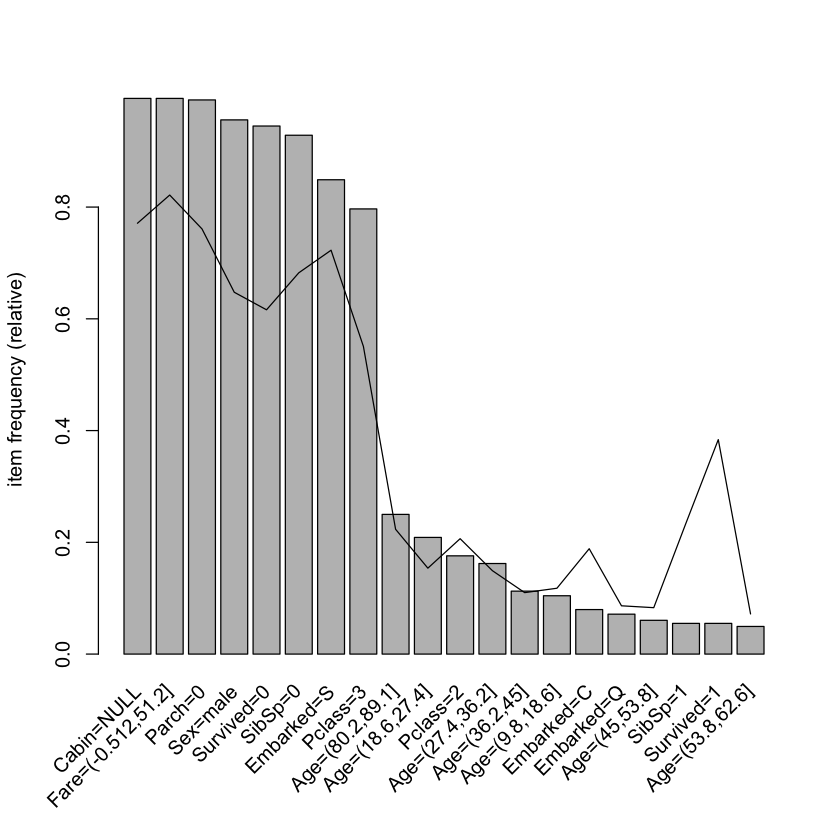

[1] 3


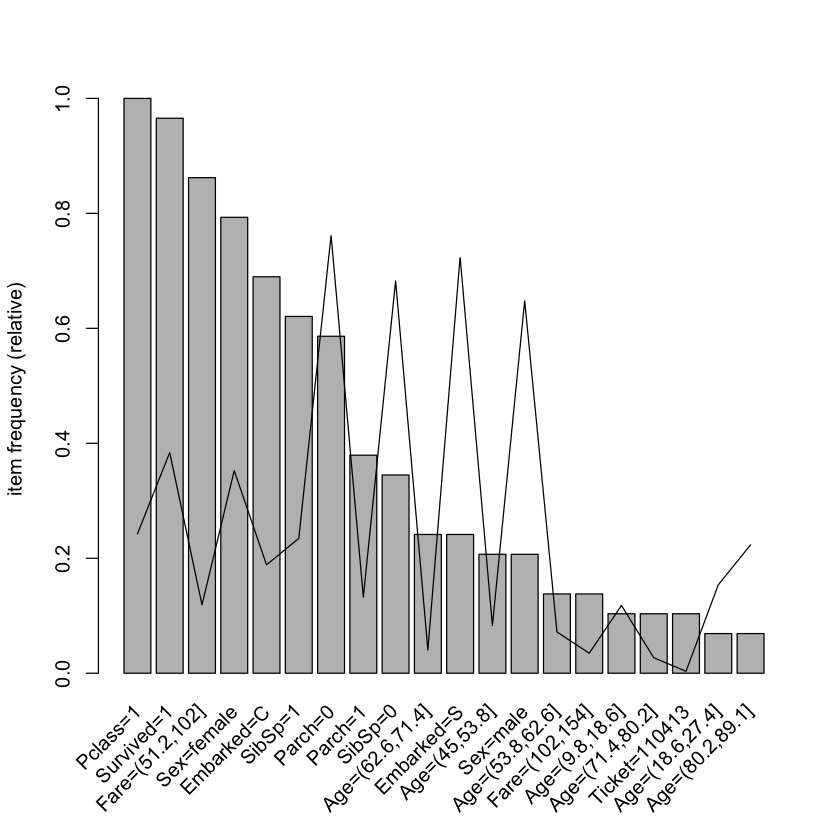

[1] 4


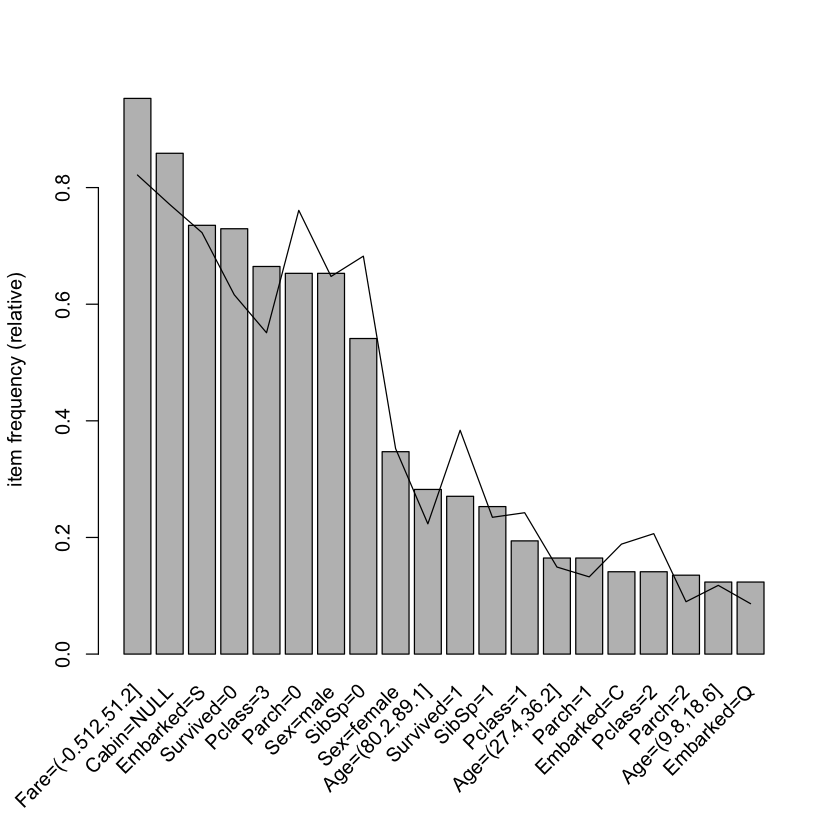

[1] 5


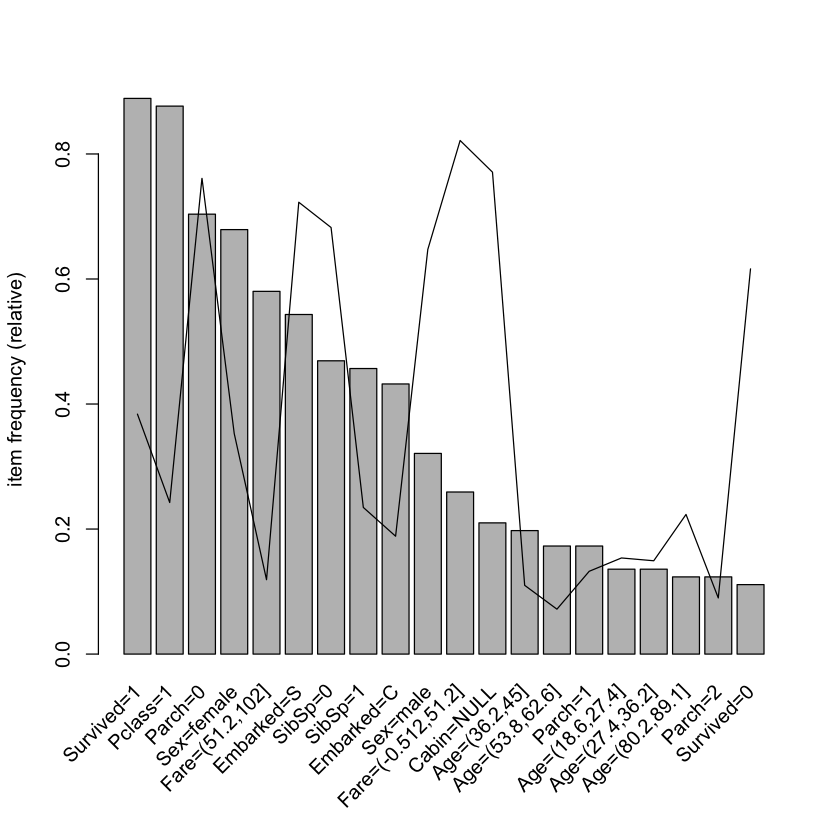

[1] 6


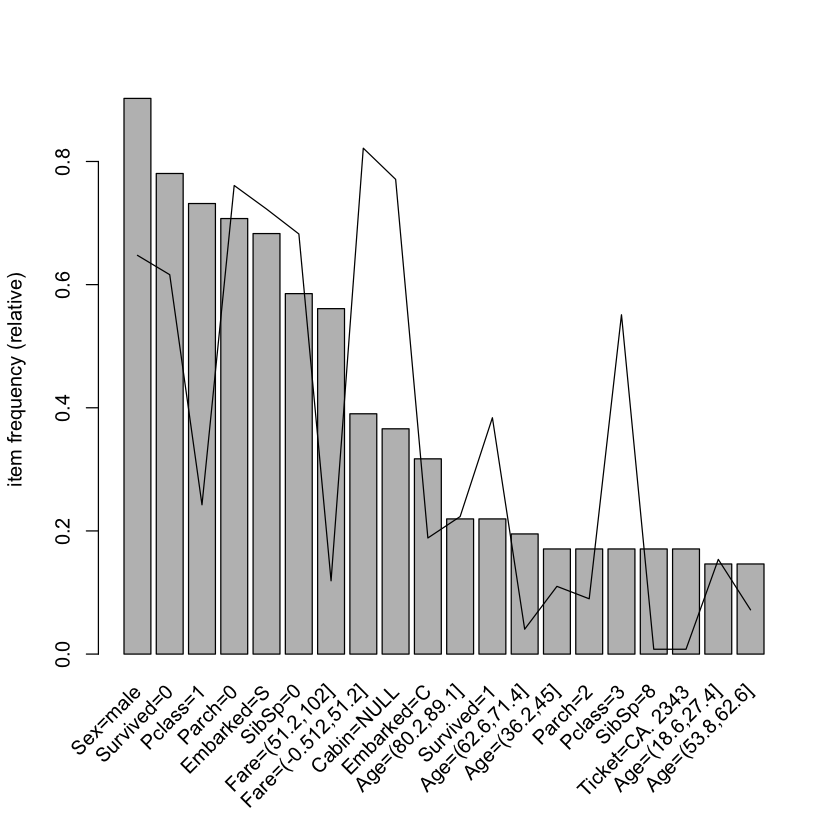

[1] 7


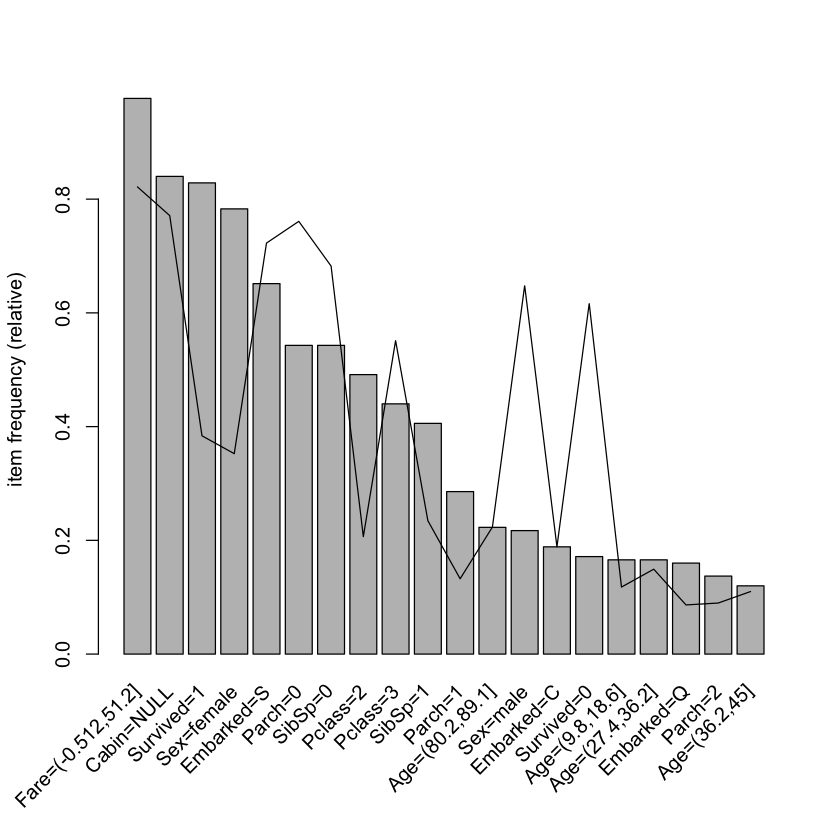

[1] 8


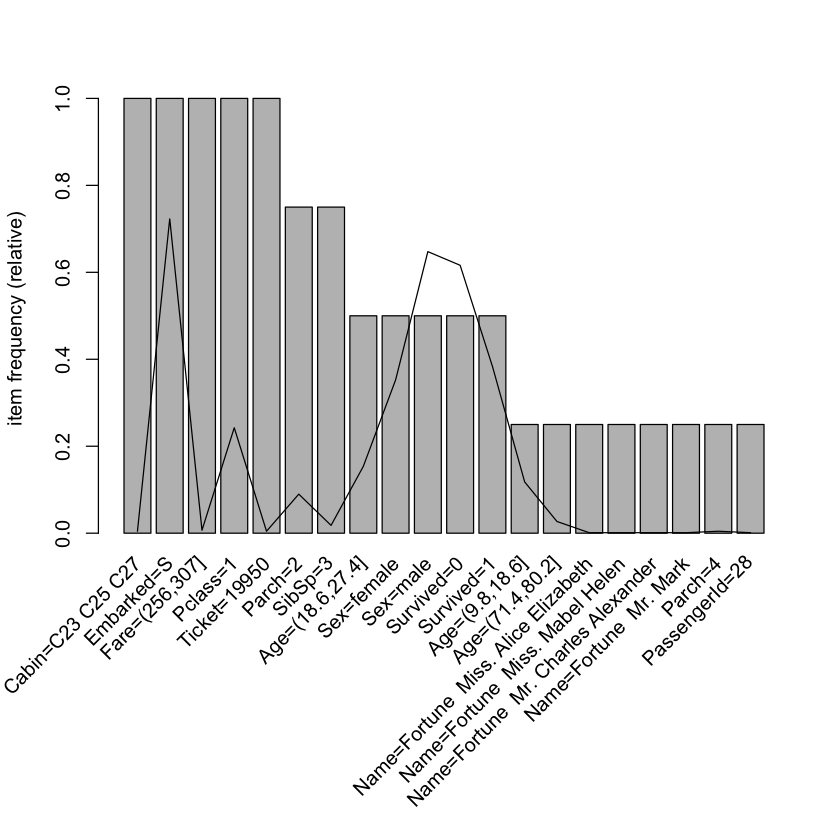

[1] 9


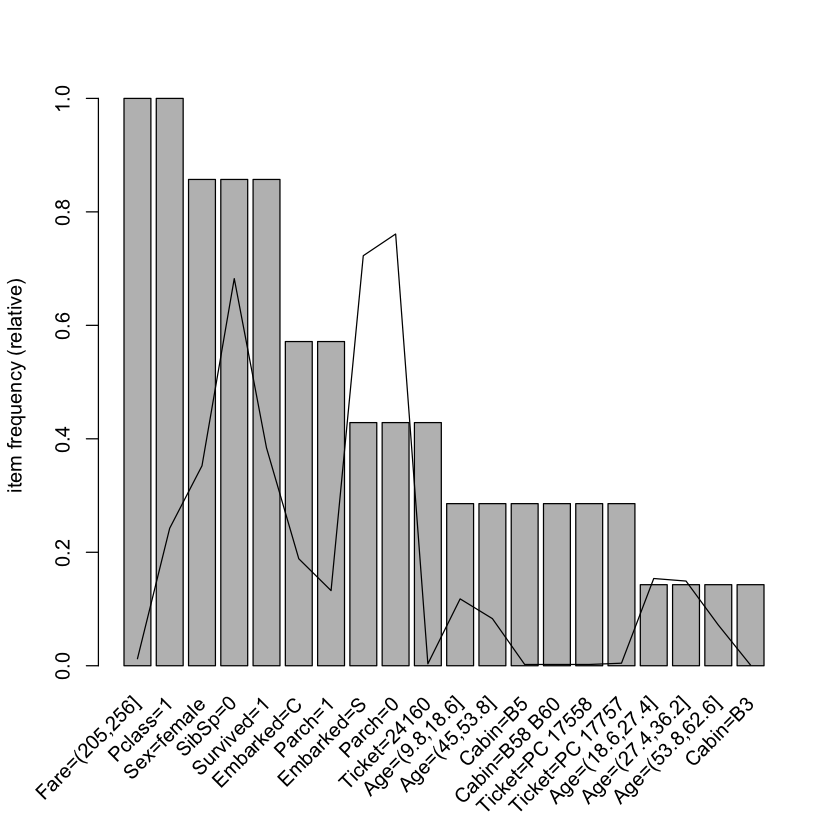

[1] 10


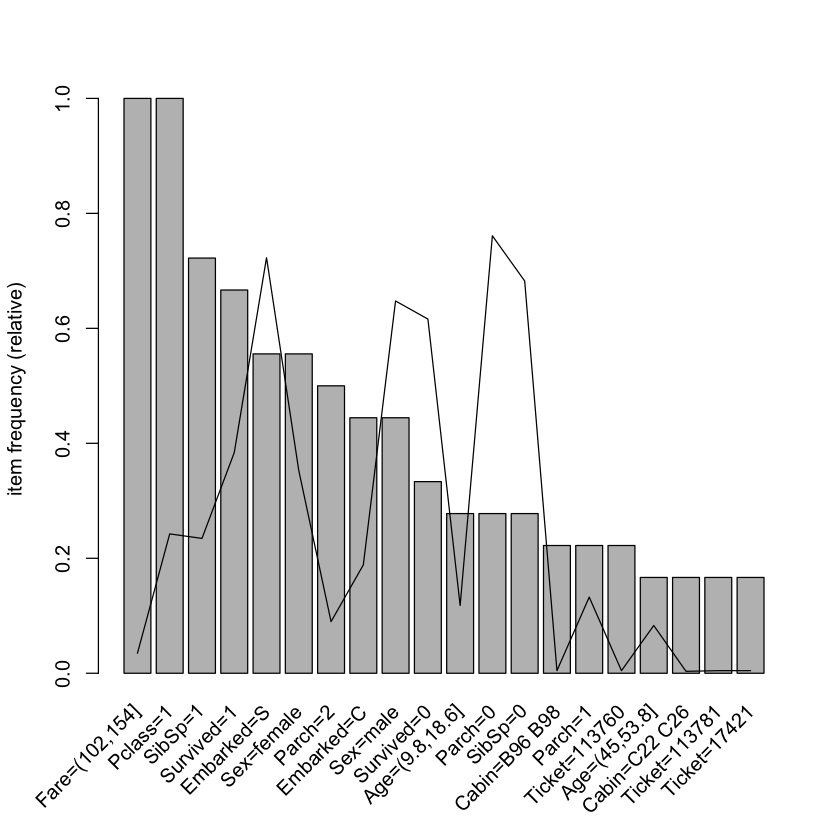

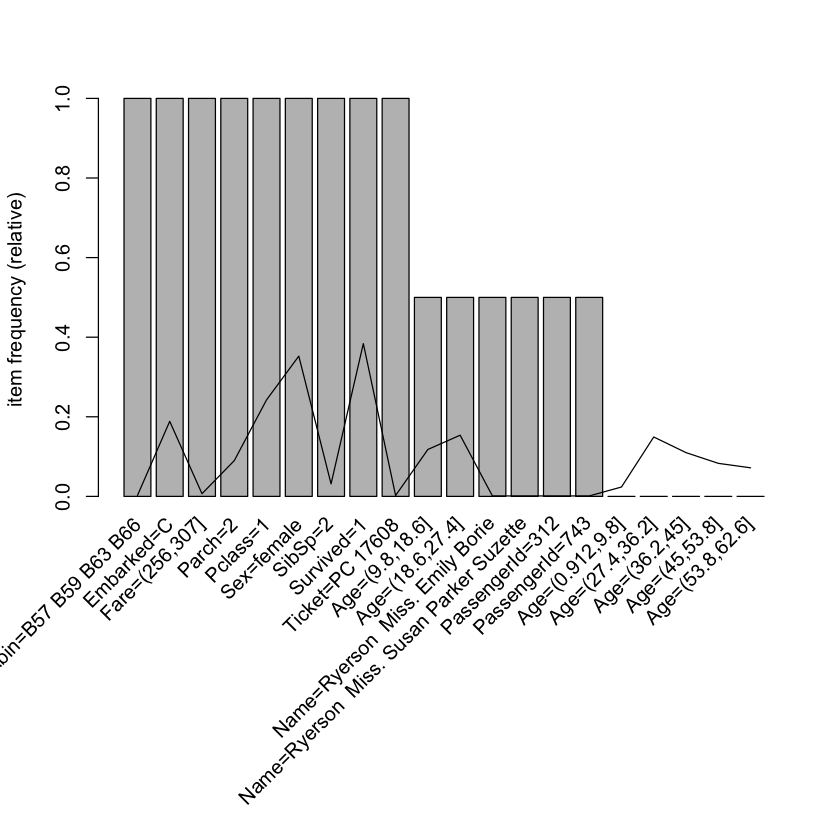

In [38]:
continuous_columns <- list("Age",
                           "Fare"
                           )

drop_columns <- list()

df <- read.csv(paste(DATA_DIR_NAME, "titanic.csv", sep=""), na.strings=c(""), check.names=FALSE)

# Convert to transactions and create clusters
trans <- prepare_data(df, continuous_columns, drop_columns)
assign <- clusters(trans)

df$"__CLUSTER__" <- assign

write.table(df, file=paste(DATA_DIR_NAME, "titanic_clusters.csv", sep=""), row.names=FALSE, sep=',')